<a href="https://colab.research.google.com/github/moncykurien/practice_projects/blob/master/PracticeProject19_Covid19Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

The size of the country and its population along with number of Confirmed cases and number of recovery can impact the number of deaths. So get the Size of the country and its population.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/aggregate_covid_country.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
df.shape

(23688, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [15]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [16]:
import datetime

In [17]:
df[['Country','Date']].describe()

,Country,Date
count,23688,23688
unique,188,126
top,US,2020-05-26
freq,126,188


Observations:

1. There are 188 countries and 126 dates in the dataset.
2. Total number of rows 23688.
3. 126 x 188 = 23688(meaning every single country has every sinle dates in the dataset). None of the country is missing any data for any date.

In [18]:
str(datetime.datetime.strptime(df['Date'].max(), "%Y-%m-%d").month - datetime.datetime.strptime(df['Date'].min(), "%Y-%m-%d").month)+'+ months'

'4+ months'

Observations:

1. The data we have is for 4 months and few days.

In [19]:
df[['Confirmed','Recovered','Deaths']].sum()/1000000

Confirmed    188.778378
Recovered     61.157719
Deaths        12.482037
dtype: float64

Observations:

In just 4 months:
1. There were 188.8 million confirmed cases across the whole world.
2. There were 12.5 million deaths recorded due to COVID 19.
3. About 61.2 Million patients recovered.

In [20]:
df[['Recovered','Deaths']].sum()/df['Confirmed'].sum()*100

Recovered    32.396570
Deaths        6.612006
dtype: float64

Observations:
1. The Recovery rate slightly higher than 5 times the death rate in the confirmed cases in the 4 month period we have.

In [21]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

Observations:
There are no null values in the data

In [22]:
df[['Country', 'Confirmed', 'Recovered', 'Deaths']].groupby(by='Country').sum().sort_values(by='Deaths', ascending=False)

,Confirmed,Recovered,Deaths
Country,,,
US,57098767,8428678,3221969
Italy,11896347,4354815,1568276
United Kingdom,9150537,43829,1329006
Spain,11890691,5770271,1302010
France,8746538,2519190,1209634
...,...,...,...
Saint Vincent and the Grenadines,793,379,0
Fiji,979,476,0
Cambodia,8024,5888,0


In [7]:
rate_by_country=df[['Country', 'Deaths','Confirmed', 'Recovered']].groupby(by='Country').sum().sort_values(by='Deaths', ascending=False)
rate_by_country['Death_rate'] = round(rate_by_country['Deaths']/rate_by_country['Confirmed']*100).astype('int')
rate_by_country['Recovery_rate'] = round(rate_by_country['Recovered']/rate_by_country['Confirmed']*100).astype('int')
rate_by_country.head(10)

,Deaths,Confirmed,Recovered,Death_rate,Recovery_rate
Country,,,,,
US,3221969,57098767,8428678,6,15
Italy,1568276,11896347,4354815,13,37
United Kingdom,1329006,9150537,43829,15,0
Spain,1302010,11890691,5770271,11,49
France,1209634,8746538,2519190,14,29
Brazil,438199,6701409,2666743,7,40
China,384657,8871610,6776464,4,76
Belgium,362702,2480956,587424,15,24
Iran,352960,5778865,3973261,6,69


In [8]:
rate_by_country.loc['India']

Deaths             83979
Confirmed        2677040
Recovered         903541
Death_rate             3
Recovery_rate         34
Name: India, dtype: int64

In [9]:
data = df.copy()
data['Death_rate'] = data['Country'].apply(lambda x: rate_by_country.loc[x]['Death_rate'])
data['Recovery_rate'] = data['Country'].apply(lambda x: rate_by_country.loc[x]['Recovery_rate'])
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate
0,2020-01-22,Afghanistan,0,0,0,3,11
1,2020-01-22,Albania,0,0,0,4,62
2,2020-01-22,Algeria,0,0,0,10,45
3,2020-01-22,Andorra,0,0,0,5,50
4,2020-01-22,Angola,0,0,0,7,27


In [10]:
data.Death_rate.nunique()

18

In [11]:
data.Recovery_rate.nunique()

69

In [12]:
data.groupby(by='Country').mean().sort_values('Deaths',ascending=False)

,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate
Country,,,,,
US,453164.817460,66894.269841,25571.182540,6.0,15.0
Italy,94415.452381,34562.023810,12446.634921,13.0,37.0
United Kingdom,72623.309524,347.849206,10547.666667,15.0,0.0
Spain,94370.563492,45795.801587,10333.412698,11.0,49.0
France,69416.968254,19993.571429,9600.269841,14.0,29.0
...,...,...,...,...,...
Saint Vincent and the Grenadines,6.293651,3.007937,0.000000,0.0,48.0
Fiji,7.769841,3.777778,0.000000,0.0,49.0
Cambodia,63.682540,46.730159,0.000000,0.0,73.0


Observations:
1. Although US has the highest deaths, the death_rate for US is not the highest.
2. We can also see that the economic Gaints are on the top with high Confirmed rates and the Death rates while smaller countries in the bottom show0 deaths and the recovery_rate is fairly high.

In [13]:
data.groupby(by='Country').mean().sort_values('Death_rate',ascending=False)

,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate
Country,,,,,
MS Zaandam,4.063492,0.000000,0.888889,22.0,0.0
Yemen,21.396825,0.730159,3.650794,17.0,3.0
Belgium,19690.126984,4662.095238,2878.587302,15.0,24.0
United Kingdom,72623.309524,347.849206,10547.666667,15.0,0.0
France,69416.968254,19993.571429,9600.269841,14.0,29.0
...,...,...,...,...,...
Nepal,65.690476,10.507937,0.230159,0.0,16.0
Seychelles,5.730159,2.547619,0.000000,0.0,44.0
Eritrea,16.714286,8.460317,0.000000,0.0,51.0


Observations:
1. This is interesting. For MS Zaandam, the mean confirmed and deaths are pretty low yet the death rate is the highest.
2. I found out that Zaandan is actually a cruise ship and not a Country that we have in this dataset. Ref -> https://en.wikipedia.org/wiki/COVID-19_pandemic_on_cruise_ships#Zaandam
3. Looks like it was not allowed to port since it had COVID positive cases. Since it was a closed vessel that might have been the cause of the increased death rate.

In [14]:
data[data['Country']=='MS Zaandam'][['Confirmed','Recovered','Deaths']].sum()

Confirmed    512
Recovered      0
Deaths       112
dtype: int64

Apparently there were 1,829 travellers onboard on Zaandam and we can see that 512 of them got infected by May 2020 and 112 people died.

In [15]:
data.groupby(by='Country').mean().sort_values('Recovery_rate',ascending=False)

,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate
Country,,,,,
China,70409.603175,53781.460317,3052.833333,4.0,76.0
Cambodia,63.682540,46.730159,0.000000,0.0,73.0
Thailand,1349.246032,985.492063,21.420635,2.0,73.0
Iceland,859.357143,622.515873,4.134921,0.0,72.0
Saint Lucia,7.730159,5.515873,0.000000,0.0,71.0
...,...,...,...,...,...
South Sudan,57.706349,0.579365,0.523810,1.0,1.0
Netherlands,16469.595238,92.793651,1938.269841,12.0,1.0
Lesotho,0.150794,0.000000,0.000000,0.0,0.0


Observations:
1. Interesting to see that China is leading the Recovery Rate.
2. United Kingdom is at the last along with Zaandam in the Recovery Rate. Ma be because most of the people infected in UK were in their old age. This may not be true. We need more data to find that.

In [16]:
data['Actives'] = data['Confirmed'] - (data['Recovered'] + data['Deaths'])
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives
0,2020-01-22,Afghanistan,0,0,0,3,11,0
1,2020-01-22,Albania,0,0,0,4,62,0
2,2020-01-22,Algeria,0,0,0,10,45,0
3,2020-01-22,Andorra,0,0,0,5,50,0
4,2020-01-22,Angola,0,0,0,7,27,0


### Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
dt=data[['Date','Confirmed','Deaths','Recovered','Actives']].groupby(by='Date').sum()
dt['Dates'] = dt.index

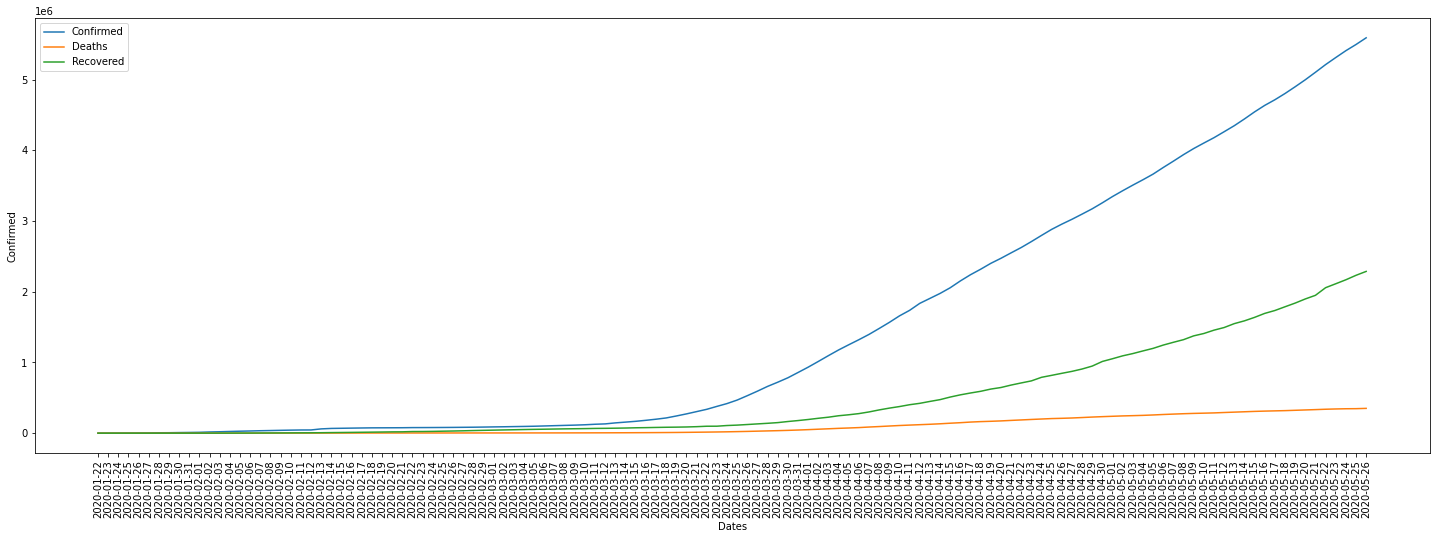

In [19]:
plt.figure(figsize=(25,8))
sns.lineplot(x=dt['Dates'],y=dt['Confirmed'])
sns.lineplot(x=dt['Dates'],y=dt['Deaths'])
sns.lineplot(x=dt['Dates'],y=dt['Recovered'])
plt.legend(['Confirmed','Deaths','Recovered'])
plt.xticks(rotation=90)
plt.show()

In [20]:
#Trying plotly
fig = go.Figure()
a=go.Scatter(name='Confirmed',x=dt['Dates'],y=dt['Confirmed'])
b=go.Scatter(name='Recovered',x=dt['Dates'],y=dt['Recovered'])
c=go.Scatter(name='Deaths',x=dt['Dates'],y=dt['Deaths'])
d=go.Scatter(name='Actives',x=dt['Dates'],y=dt['Actives'])
fig.add_traces([a,b,c,d])
fig.show()

1. We can clearly see that the confirmed cases are exponentially rising  since march 2020.This gives us an idea of the spreading rate of COVID 19.
2. The Recovery is definitely higher than the deaths.

In [21]:
cn = data[['Country','Confirmed','Deaths','Recovered','Actives']].groupby(by='Country').sum().sort_values(by='Actives',ascending=False).head(10)
cn.style.bar()

,Confirmed,Deaths,Recovered,Actives
Country,,,,
US,57098767,3221969,8428678,45448120
United Kingdom,9150537,1329006,43829,7777702
Italy,11896347,1568276,4354815,5973256
Russia,7459042,70758,1586423,5801861
France,8746538,1209634,2519190,5017714
Spain,11890691,1302010,5770271,4818410
Brazil,6701409,438199,2666743,3596467
Turkey,5868751,152495,2895790,2820466
Germany,9046257,319666,6102898,2623693


Observations:
1. US had the most active cases by May 2020.
2. UK at the 2nd place in the number of active carriers of COVID 19.
3. The difference between 1st and 2nd place is huge in terms of active carriers with about 37.7 Million. It spreaded quite fast in the US.

Looking at how India handled it.

In [22]:

India_data = pd.pivot_table(data, index=['Country','Date'], values=['Confirmed','Recovered','Deaths','Actives'], aggfunc='sum').loc['India']
India_data['Dates'] = India_data.index

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
dt1 = pd.DataFrame(sc.fit_transform(dt[['Confirmed','Deaths','Recovered','Actives']]),columns=['Confirmed','Deaths','Recovered','Actives'],index=dt.index)
dt1['Dates'] = dt1.index
India_data1 = pd.DataFrame(sc.fit_transform(India_data[['Confirmed','Deaths','Recovered','Actives']]),columns=['Confirmed','Deaths','Recovered','Actives'],index=India_data.index)
India_data1['Dates'] = India_data1.index

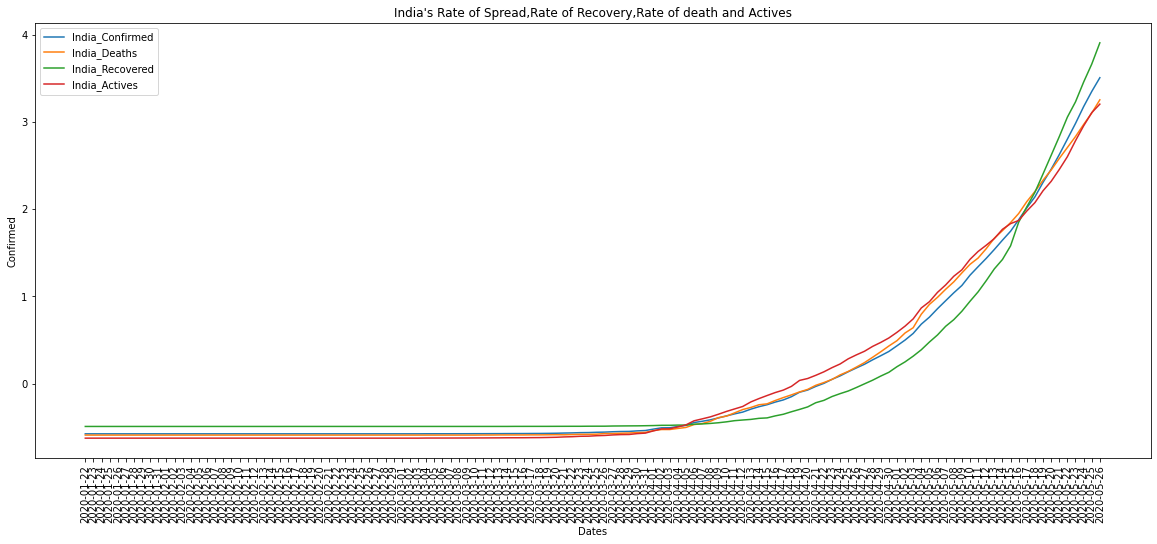

In [25]:
plt.figure(figsize=(20,8))
plt.title("India's Rate of Spread,Rate of Recovery,Rate of death and Actives")
sns.lineplot(x=India_data1['Dates'],y=India_data1['Confirmed'])
sns.lineplot(x=India_data1['Dates'],y=India_data1['Deaths'])
sns.lineplot(x=India_data1['Dates'],y=India_data1['Recovered'])
sns.lineplot(x=India_data1['Dates'],y=India_data1['Actives'])
plt.legend(['India_Confirmed','India_Deaths','India_Recovered','India_Actives'])
plt.xticks(rotation=90)
plt.show()

Observations - India:
1. The virus started to exponentialy spread in India after the 1st week of April 2020
2. The recovery rate was higher than the spreading rate in the begining but after the 1st week of April 2020 the recovery rate really droped and the Death Rate actually increased more than Recovery Rate.
3. After the surge by mid of May 2020 the recovery rate started increasing and the death rate decreased.
4. Approximately on 15th,16th and 17th of May 2020, the rate of death was higher than the rate of spread and the rate of recovery.

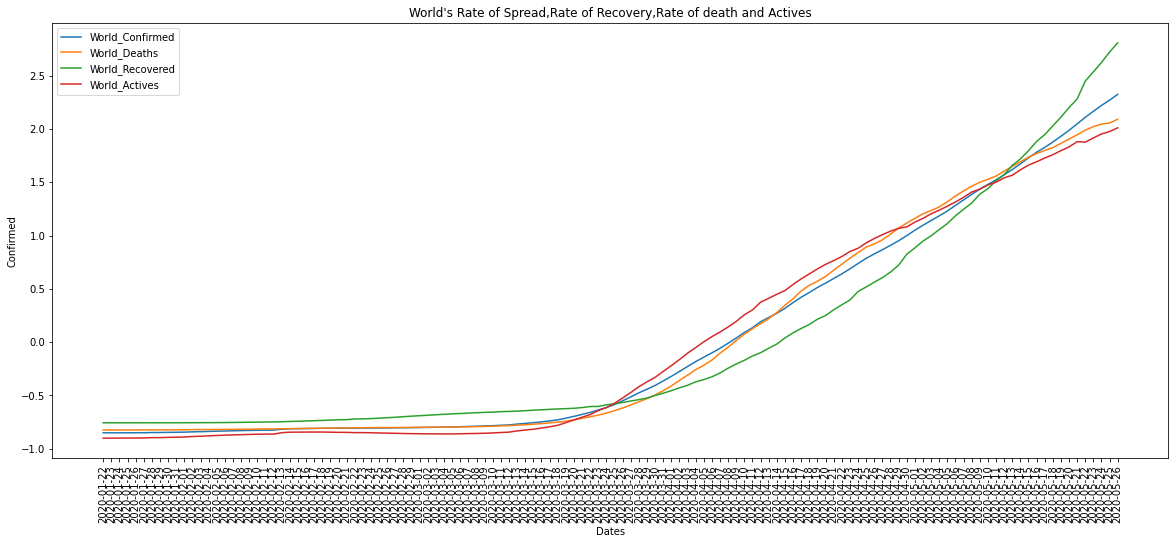

In [26]:
plt.figure(figsize=(20,8))
plt.title("World's Rate of Spread,Rate of Recovery,Rate of death and Actives")
sns.lineplot(x=dt1['Dates'],y=dt1['Confirmed'])
sns.lineplot(x=dt1['Dates'],y=dt1['Deaths'])
sns.lineplot(x=dt1['Dates'],y=dt1['Recovered'])
sns.lineplot(x=dt1['Dates'],y=dt1['Actives'])
plt.legend(['World_Confirmed','World_Deaths','World_Recovered','World_Actives'])
plt.xticks(rotation=90)

plt.show()

Observations - World:
1. By mid of March 2020, the rate of spread started increasing exponentialy.
2. By April 2020 the rate of Death was higher than the rate of recovery.
3. Between mid of April 2020 and mid of May 2020 the Rate of death actually was higher than the rate of spread.
4. After that the rate of Recovery started gaining momentum.

In [27]:
data.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Death_rate',
       'Recovery_rate', 'Actives'],
      dtype='object')

In [28]:
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



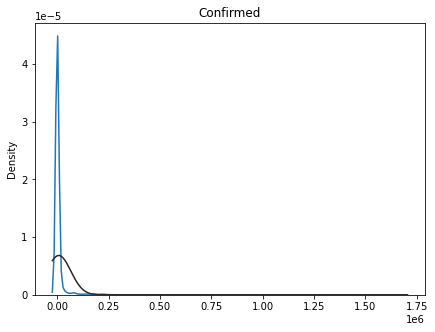

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



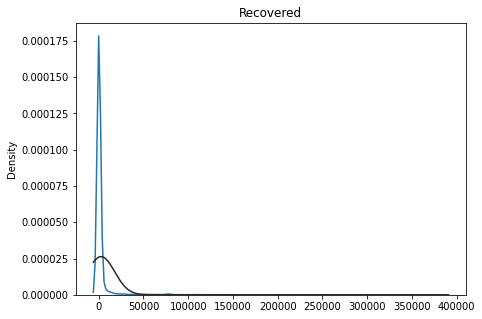

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



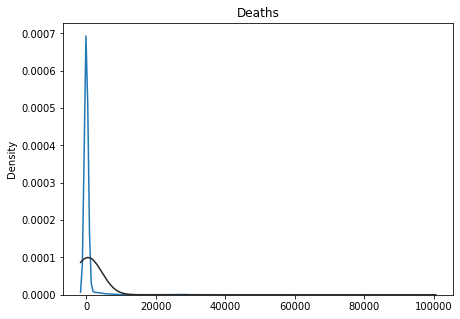

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



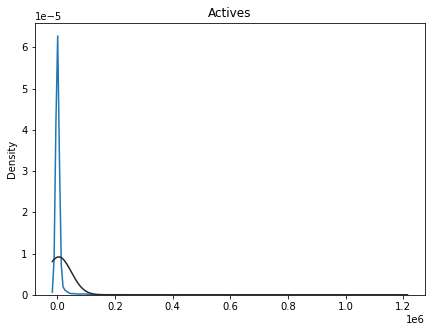

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



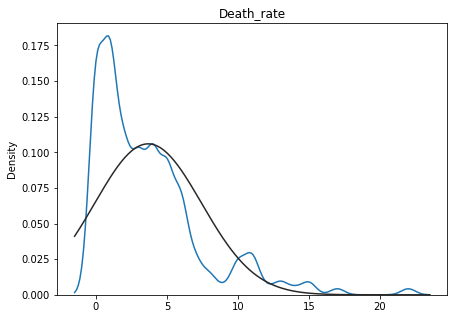

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



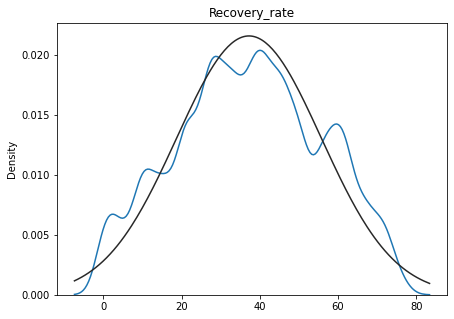

In [29]:
for col in ['Confirmed', 'Recovered', 'Deaths', 'Actives', 'Death_rate','Recovery_rate']:
  plt.figure(figsize=(7,5))
  plt.title(col)
  sns.distplot(x=data[col], fit = norm, hist=False,)
  plt.show()

In [30]:
import calendar

In [31]:
data['Month'] = df['Date'].apply(lambda x: calendar.month_abbr[int(x.split('-')[1])])
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives,Month
0,2020-01-22,Afghanistan,0,0,0,3,11,0,Jan
1,2020-01-22,Albania,0,0,0,4,62,0,Jan
2,2020-01-22,Algeria,0,0,0,10,45,0,Jan
3,2020-01-22,Andorra,0,0,0,5,50,0,Jan
4,2020-01-22,Angola,0,0,0,7,27,0,Jan


In [32]:
data['Day'] = df['Date'].apply(lambda x: x.split('-')[2])
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives,Month,Day
0,2020-01-22,Afghanistan,0,0,0,3,11,0,Jan,22
1,2020-01-22,Albania,0,0,0,4,62,0,Jan,22
2,2020-01-22,Algeria,0,0,0,10,45,0,Jan,22
3,2020-01-22,Andorra,0,0,0,5,50,0,Jan,22
4,2020-01-22,Angola,0,0,0,7,27,0,Jan,22


In [33]:
month_data = pd.pivot_table(data, index=['Month'], values=['Confirmed','Deaths','Actives','Recovered'], aggfunc='sum')
day_data = pd.pivot_table(data, index=['Day'], values=['Confirmed','Deaths','Actives','Recovered'], aggfunc='sum')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



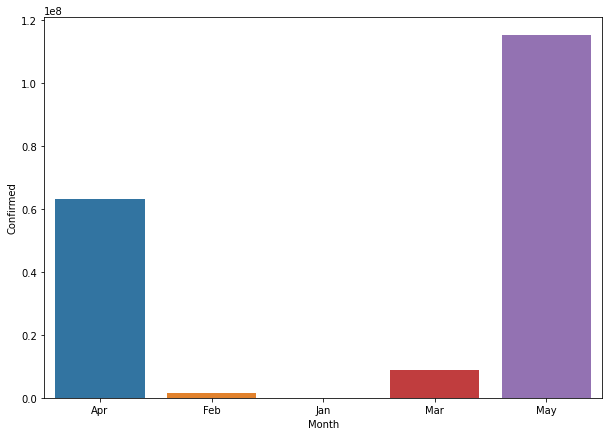

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(month_data.index,month_data['Confirmed'])
plt.show()

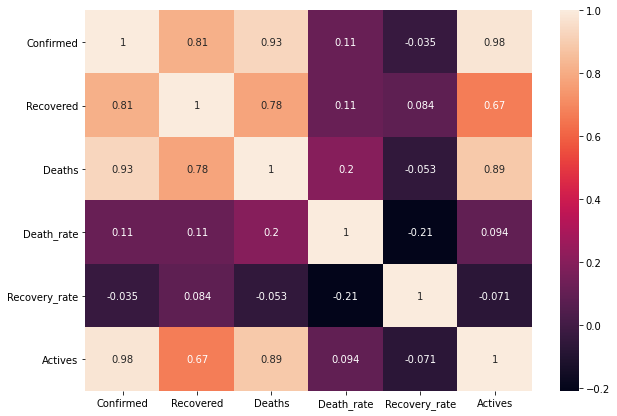

In [35]:
corr = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()

In [36]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives,Month,Day
0,2020-01-22,Afghanistan,0,0,0,3,11,0,Jan,22
1,2020-01-22,Albania,0,0,0,4,62,0,Jan,22
2,2020-01-22,Algeria,0,0,0,10,45,0,Jan,22
3,2020-01-22,Andorra,0,0,0,5,50,0,Jan,22
4,2020-01-22,Angola,0,0,0,7,27,0,Jan,22


Reference: https://www.pluralsight.com/guides/machine-learning-for-time-series-data-in-python

In [37]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.strftime("%Y-%m-%d")
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['dayofyear'] = pd.DatetimeIndex(data['Date']).dayofyear
data['weekofyear'] = pd.DatetimeIndex(data['Date']).weekofyear
data['weekday'] = pd.DatetimeIndex(data['Date']).weekday
data['quarter'] = pd.DatetimeIndex(data['Date']).quarter
data['is_month_start'] = pd.DatetimeIndex(data['Date']).is_month_start
data['is_month_end'] = pd.DatetimeIndex(data['Date']).is_month_end
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            23688 non-null  object
 1   Country         23688 non-null  object
 2   Confirmed       23688 non-null  int64 
 3   Recovered       23688 non-null  int64 
 4   Deaths          23688 non-null  int64 
 5   Death_rate      23688 non-null  int64 
 6   Recovery_rate   23688 non-null  int64 
 7   Actives         23688 non-null  int64 
 8   Month           23688 non-null  int64 
 9   Day             23688 non-null  int64 
 10  dayofyear       23688 non-null  int64 
 11  weekofyear      23688 non-null  int64 
 12  weekday         23688 non-null  int64 
 13  quarter         23688 non-null  int64 
 14  is_month_start  23688 non-null  bool  
 15  is_month_end    23688 non-null  bool  
dtypes: bool(2), int64(12), object(2)
memory usage: 2.6+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [38]:
data

,Date,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives,Month,Day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,2020-01-22,Afghanistan,0,0,0,3,11,0,1,22,22,4,2,1,False,False
1,2020-01-22,Albania,0,0,0,4,62,0,1,22,22,4,2,1,False,False
2,2020-01-22,Algeria,0,0,0,10,45,0,1,22,22,4,2,1,False,False
3,2020-01-22,Andorra,0,0,0,5,50,0,1,22,22,4,2,1,False,False
4,2020-01-22,Angola,0,0,0,7,27,0,1,22,22,4,2,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,1,44,61,5,26,147,22,1,2,False,False
23684,2020-05-26,Western Sahara,9,6,1,0,61,2,5,26,147,22,1,2,False,False
23685,2020-05-26,Yemen,249,10,49,17,3,190,5,26,147,22,1,2,False,False
23686,2020-05-26,Zambia,920,336,7,1,35,577,5,26,147,22,1,2,False,False


In [39]:
data.drop(['Date'],axis=1,inplace=True)

In [40]:
data.head()

,Country,Confirmed,Recovered,Deaths,Death_rate,Recovery_rate,Actives,Month,Day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,Afghanistan,0,0,0,3,11,0,1,22,22,4,2,1,False,False
1,Albania,0,0,0,4,62,0,1,22,22,4,2,1,False,False
2,Algeria,0,0,0,10,45,0,1,22,22,4,2,1,False,False
3,Andorra,0,0,0,5,50,0,1,22,22,4,2,1,False,False
4,Angola,0,0,0,7,27,0,1,22,22,4,2,1,False,False


### Encoding

In [41]:
data = pd.get_dummies(data, columns=['Month'], drop_first=True, prefix='month')

data = pd.get_dummies(data, columns=['weekday'], drop_first=True, prefix='wday')
data = pd.get_dummies(data, columns=['quarter'], drop_first=True, prefix='qrtr')

data = pd.get_dummies(data, columns=['is_month_start'], drop_first=True, prefix='m_start')

data = pd.get_dummies(data, columns=['is_month_end'], drop_first=True, prefix='m_end')
data = pd.get_dummies(data, columns=['Country'], drop_first=True, prefix='Country')


In [42]:
data.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Death_rate', 'Recovery_rate',
       'Actives', 'Day', 'dayofyear', 'weekofyear', 'month_2',
       ...
       'Country_United Kingdom', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Venezuela', 'Country_Vietnam', 'Country_West Bank and Gaza',
       'Country_Western Sahara', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=209)

Splitting into train and test

In [43]:
data.drop(['Recovery_rate','Death_rate','Actives'],axis=1,inplace=True)

In [44]:
data.head()

,Confirmed,Recovered,Deaths,Day,dayofyear,weekofyear,month_2,month_3,month_4,month_5,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6,qrtr_2,m_start_True,m_end_True,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,...,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan*,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_US,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_West Bank and Gaza,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,22,22,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,22,22,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,22,22,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,22,22,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,22,22,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Reference: https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e#:~:text=The%20function%20splits%20training%20data,1%20times%20of%20cross%2Dvalidation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

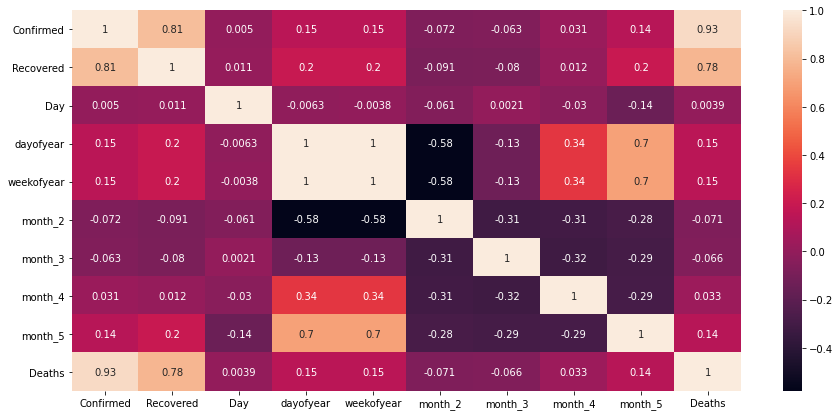

In [45]:
corr = data[['Confirmed', 'Recovered', 'Day', 'dayofyear', 'weekofyear', 'month_2',
       'month_3', 'month_4', 'month_5','Deaths']].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

In [46]:
x_train = data[:int(data.shape[0]*0.7)].drop(['Deaths'],axis=1)
x_test = data[int(data.shape[0]*0.7):].drop(['Deaths'],axis=1)
y_train = data[:int(data.shape[0]*0.7)]['Deaths']
y_test = data[int(data.shape[0]*0.7):]['Deaths']

In [47]:
x_train.shape, x_test.shape

((16581, 205), (7107, 205))

Normalising for PCA

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

PCA

In [50]:
#from sklearn.decomposition import PCA
from statsmodels.multivariate.pca import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [51]:
pca = PCA(data, method='eig')
#x_train_p = pca.fit_transform(x_train_s)
#x_test_p = pca.transform(x_test_s)
components_df=pca.factors
combo = pd.concat([data, components_df], axis=1)
corr = combo.corr()

TimeSeriesSplit

In [ ]:
pip install statsmodels


In [52]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [60]:
est = sm.OLS(y_train, x_train_s).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Deaths   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              432.7
Date:                Fri, 05 Feb 2021   Prob (F-statistic):                        0.00
Time:                        03:12:24   Log-Likelihood:                     -1.2754e+05
No. Observations:               16581   AIC:                                  2.555e+05
Df Residuals:                   16380   BIC:                                  2.570e+05
Df Model:                         201                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
x_train.columns

Index(['Confirmed', 'Recovered', 'Day', 'dayofyear', 'weekofyear', 'month_2',
       'month_3', 'month_4', 'month_5', 'wday_1',
       ...
       'Country_United Kingdom', 'Country_Uruguay', 'Country_Uzbekistan',
       'Country_Venezuela', 'Country_Vietnam', 'Country_West Bank and Gaza',
       'Country_Western Sahara', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=205)

In [76]:
models = [SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]
for model in models:
  score = []
  tscv = TimeSeriesSplit(n_splits=5)
  MSE = cross_val_score(model, x_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
  print(f"Model {model} | Error: {0:.3f} (+/- {1:.3f})".format(MSE, MSE.std()))


Model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) | Error: 0.000 (+/- 1.000)
Model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') | Error: 0.000 (+/- 1.000)
Model RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                     

In [53]:
from sklearn.metrics import mean_squared_error

GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [62]:
model = XGBRegressor()
params = {"n_estimators":[int(x) for x in np.linspace(200,3000,5)],
    "learning_rate"    : [0.1] ,
 "max_depth"        : [ 2, 3],
 "gamma"            : [ 0.05, 0.09]}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=params, scoring= 'r2', n_jobs = -1, verbose=10)
gsearch.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 63.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 76.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 84.9min finished


[11:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.05, 0.09], 'learning_rate': [0.1],
  

In [63]:
print("The best score: ",gsearch.best_score_)
print("Best parameters: ",gsearch.best_params_)

The best score:  0.7439191570973899
Best parameters:  {'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 3000}


## Final Model

In [ ]:
xgbr = XGBRegressor(gamma= 0.05, learning_rate= 0.1, max_depth= 2, n_estimators= 3000,verbosity=2)
xgbr.fit(x_train, y_train)

In [56]:
y_preds = xgbr.predict(x_test)
print(f"MSE: {mean_squared_error(y_test, y_preds)}")
print(f"R2 score: {r2_score(y_test, y_preds)}")

MSE: 11470918.723081505
R2 score: 0.7604471964232531


## Saving the model

In [57]:
import joblib
joblib.dump(xgbr,'./models/covid_model.obj')